In [ ]:
#1 What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
'''
K-Means Clustering is a partition-based clustering algorithm that groups data into a fixed number of clusters (K) by minimizing the distance between data points and their assigned cluster centroids. It is fast, scalable, and works well on large datasets where the number of clusters is known in advance. A common use case is customer segmentation in marketing, where customers are grouped based on purchase behavior.

Hierarchical Clustering builds a tree-like structure (dendrogram) that shows how data points are merged or split into clusters at different levels. It does not require specifying the number of clusters beforehand and is useful for understanding nested relationships in data. A typical use case is gene expression analysis, where hierarchical relationships between genes or samples are important.
'''

In [ ]:
#2 Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
'''
The Silhouette Score is used to evaluate how well data points have been clustered by measuring both cluster cohesion and cluster separation.

It compares how close a data point is to points in its own cluster versus points in the nearest neighboring cluster.
The score ranges from −1 to +1, where a higher value indicates better-defined and well-separated clusters.

A high silhouette score means points are correctly grouped, while a low or negative score suggests overlapping clusters or incorrect assignments.
'''

In [ ]:
#3 What are the core parameters of DBSCAN, and how do they influence the clustering process?
'''
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) uses density to form clusters, and its behavior is controlled by three core parameters.

eps (ε) defines the maximum distance between two points for them to be considered neighbors. A small eps creates tight clusters, while a large eps can merge nearby clusters.

min_samples specifies the minimum number of points required to form a dense region (a core point). Higher values make clusters harder to form and label more points as noise.

Based on these parameters, DBSCAN identifies core points, border points, and noise, allowing it to discover clusters of arbitrary shape and handle outliers effectively.
'''

In [ ]:
#4 Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
'''
Feature scaling is important for clustering algorithms like K-Means and DBSCAN because both rely on distance calculations to measure similarity between data points.

If features are on different scales, variables with larger numerical ranges dominate the distance metric and bias the clustering results. This can lead to incorrect or misleading clusters.

Scaling ensures that all features contribute equally, improving cluster accuracy, stability, and interpretability, especially when using Euclidean distance.
'''

In [ ]:
#5 What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
'''
The Elbow Method is a technique used in K-Means clustering to determine the optimal number of clusters (K).

It works by running K-Means for different values of K and plotting inertia (within-cluster sum of squares) against K. As K increases, inertia decreases because clusters become smaller and tighter.

The optimal K is chosen at the point where the decrease in inertia starts to slow down sharply, forming an “elbow” in the graph. This point represents a good balance between cluster compactness and model simplicity.
'''

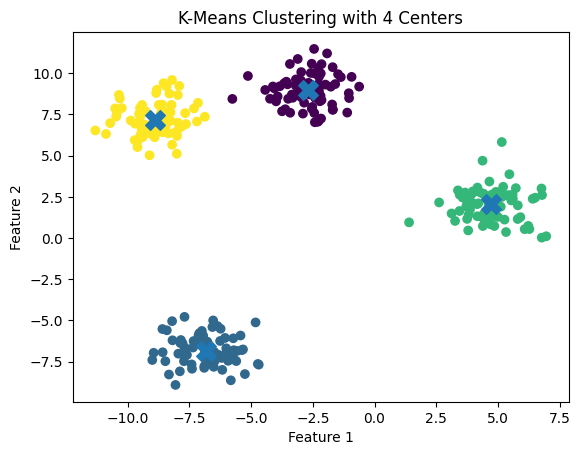

In [1]:
#6 Generate synthetic data using make_blobs(n_samples=300, centers=4),  apply KMeans clustering, and visualize the results with cluster centers.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [2]:
#7 Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
data = load_wine()
X = data.data

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (exclude noise labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


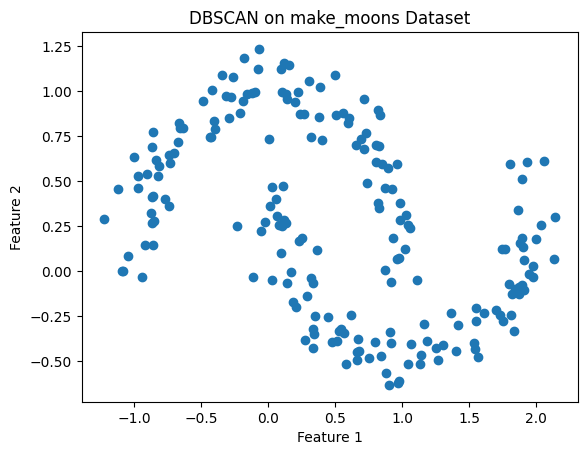

In [3]:
#8 Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Separate clusters and outliers
outliers = labels == -1
clusters = labels != -1

# Plot the results
plt.figure()
plt.scatter(X[clusters, 0], X[clusters, 1])
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x')
plt.title("DBSCAN on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



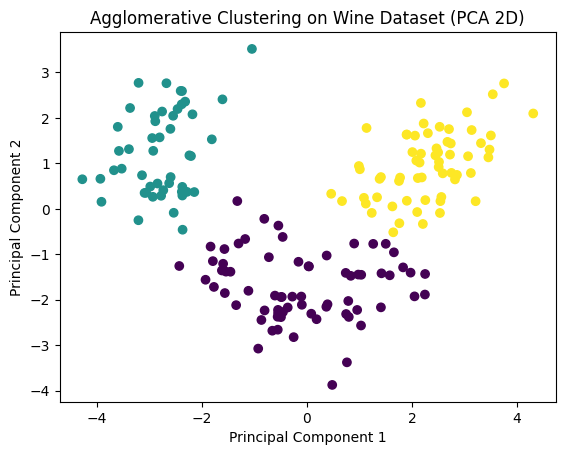

In [4]:
#9 Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
data = load_wine()
X = data.data

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

# Visualize clusters
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.show()


In [ ]:
#10
'''
 You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
'''

'''Clustering Workflow for Customer Segmentation

Clustering algorithm choice:
I would start with K-Means clustering because it is efficient, scalable, and easy to interpret for large e-commerce datasets. If the data shows irregular shapes or strong noise, I would also experiment with DBSCAN to detect niche customer groups and outliers.

Data preprocessing:
I would handle missing values using mean/median imputation for numerical features and mode imputation for categorical features. Categorical variables would be encoded (One-Hot Encoding), and all numerical features would be scaled using StandardScaler to ensure fair distance calculations.

Determining the number of clusters:
I would use the Elbow Method to find the point of diminishing returns and validate it with the Silhouette Score to ensure well-separated clusters. Business interpretability would also guide the final choice of cluster count.

Business value for marketing team:
The marketing team can use these clusters to design personalized promotions, identify high-value customers, re-engage churn-risk customers, and optimize campaign spending by targeting the right customers with the right offers.
'''